In [1]:
# A small sample of test beam data
wave = [[
    1554, 1558, 1555, 1564, 1558, 1555, 1556, 1554, 1750, 2284, \
    2424, 2116, 1838, 1713, 1649, 1613, 1601, 1589, 1583, 1578, \
    1572, 1574, 1573, 1569, 1567, 1562, 1563, 1560, 1561, 1557
        ],
        [
    1552, 1550, 1552, 1552, 1553, 1550, 1551, 1554, 1551, 1551,
    1582, 2617, 4401, 4371, 3194, 2360, 2013, 1844, 1743, 1687,
    1658, 1643, 1630, 1617, 1610, 1602, 1598, 1594, 1585, 1577
        ],
        [
    1558, 1558, 1554, 1557, 1560, 1560, 1558, 1559, 1556, 1553,
    1634, 1897, 1984, 1847, 1696, 1629, 1602, 1584, 1579, 1572,
    1572, 1566, 1572, 1563, 1565, 1561, 1561, 1559, 1560, 1556
        ],
    ]


In [2]:
import  matplotlib.pyplot as plt
import  numpy as np
import  scipy
from    scipy.optimize import curve_fit

from    scipy.stats import ks_2samp


Template dimensions: (487, 2)


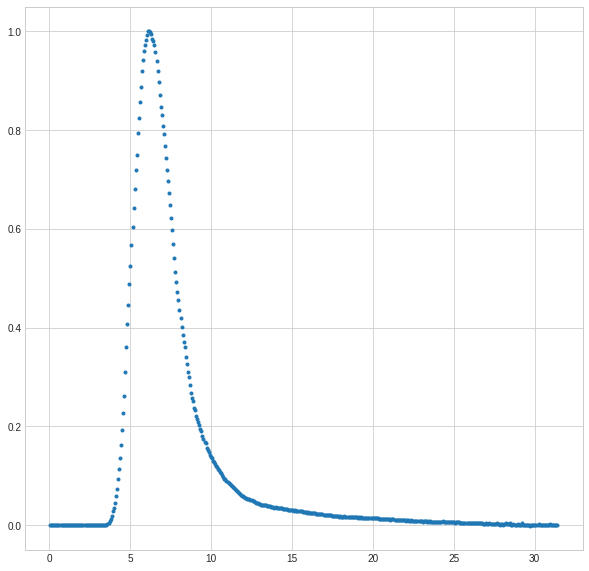

In [3]:
from numpy import loadtxt

template = loadtxt('template.csv', delimiter=',')
print(f'''Template dimensions: {template.shape}''')

# for entry in template: print(entry) print(template[:,0]) print(template[:,1])

plt.style.use('seaborn-whitegrid')
plt.rcParams["figure.figsize"] = (10,10)

_ = plt.plot(template[:,0], template[:,1], '.')

In [4]:
def tempfit(x, *par):
    return par[0]*np.interp((x - par[1]), template[:,0], template[:,1]) + par[2]
    


In [ ]:
x  = np.linspace(0, 30, 30, endpoint=False)
x1 = np.linspace(0, 30, 300, endpoint=False)

# print(x)

plt.style.use('seaborn-whitegrid')
plt.rcParams["figure.figsize"] = (10,10)

for i in range(0,3):
    plt.plot(x, wave[i], 'o')
    popt, _ = scipy.optimize.curve_fit(tempfit, x, wave[i], p0=[500.0, 7.0, 1500.0]) # , p0=guess)
    print(popt)
    plt.plot(x1, tempfit(x1, *popt))

    # residual sum of squares
    ss_res = np.sum((wave[i] - tempfit(x, *popt)) ** 2)

    # total sum of squares
    ss_tot = np.sum((wave[i] - np.mean(wave[i])) ** 2)

    # r-squared
    r2 = 1 - (ss_res / ss_tot)


    #perform Kolmogorov-Smirnov test
    ks = ks_2samp(wave[i], tempfit(x, *popt))
    
    print("R2: ", r2, ' KS: ', ks)    

Template dimensions: (363619, 2)


Text(0, 0.5, 'R2 of the fit')

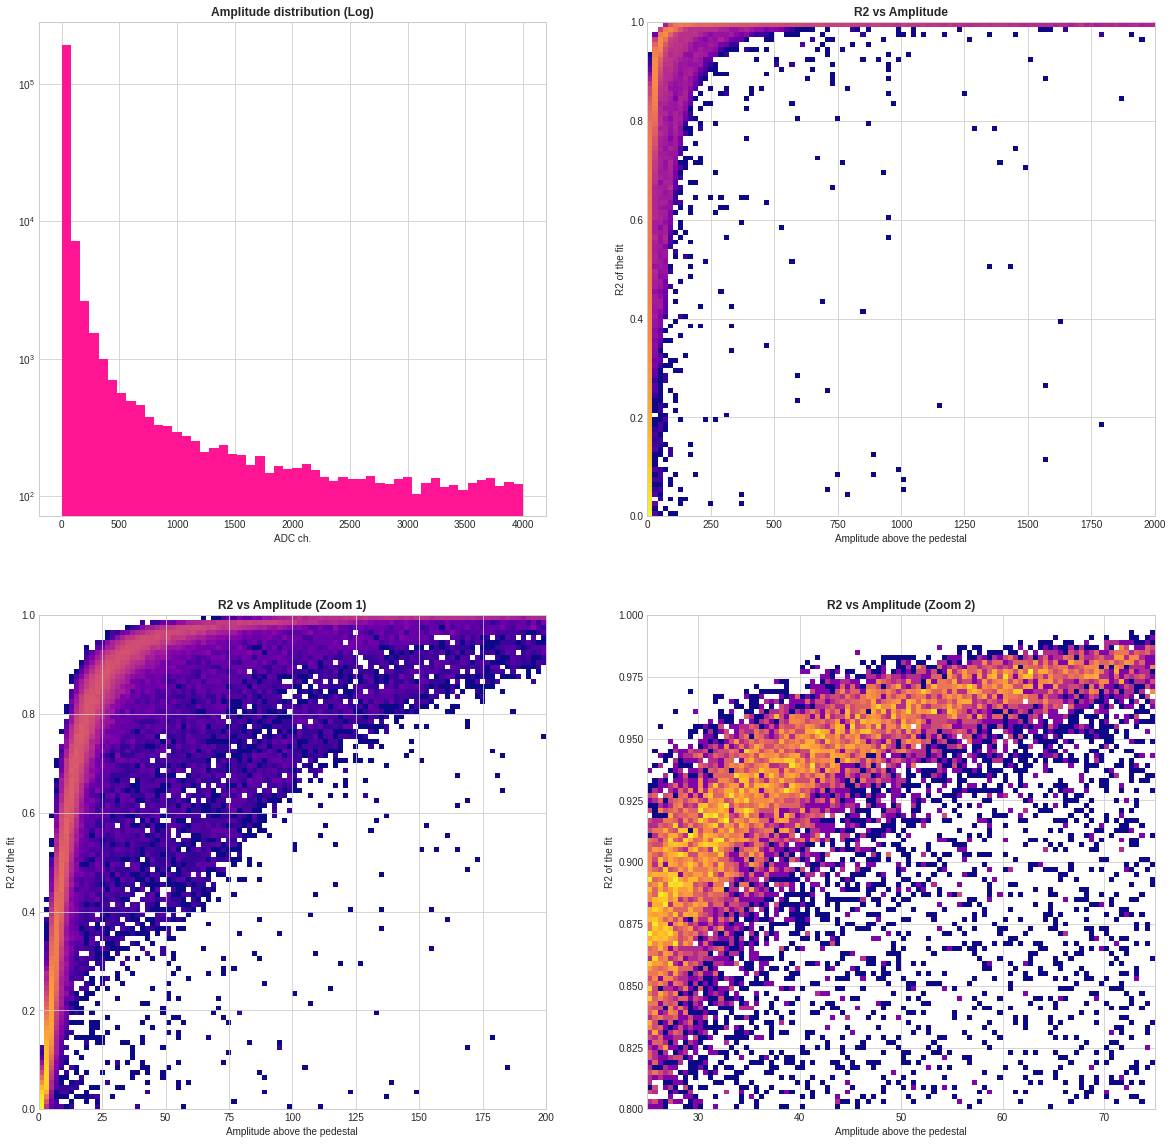

In [50]:
# Ad hoc analysis
from    matplotlib import colors
from numpy import loadtxt

r2 = loadtxt('r2.csv', delimiter=',')
print(f'''Template dimensions: {r2.shape}''')

plt.style.use('seaborn-whitegrid')
plt.rcParams["figure.figsize"] = (20,20)

# template[:,0], template[:,1]
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)

ax1.set_yscale('log')

_ = ax1.hist(r2[:,0], bins=50, color='deeppink', range=(0.0, 4000.0))
ax1.set_title('Amplitude distribution (Log)', fontweight='bold')
ax1.set_xlabel('ADC ch.')

ax2.grid(False)
_ = ax2.hist2d(r2[:,0], r2[:,1], bins=(100,100), range=((0.0, 2000.0), (0, 1.0)), norm=colors.LogNorm(1.0), cmap='plasma')
ax2.grid(True)
ax2.set_title('R2 vs Amplitude', fontweight='bold')
ax2.set_xlabel('Amplitude above the pedestal')
ax2.set_ylabel('R2 of the fit')


ax3.xaxis.set_zorder(10.0)
ax3.yaxis.set_zorder(10.0)

ax3.grid(False)
_ = ax3.hist2d(r2[:,0], r2[:,1], bins=(100,100), range=((0.0, 200.0), (0, 1.0)), norm=colors.LogNorm(1.0), cmap='plasma')

ax3.grid(True)
ax3.set_title('R2 vs Amplitude (Zoom 1)', fontweight='bold')
ax3.set_xlabel('Amplitude above the pedestal')
ax3.set_ylabel('R2 of the fit')

ax4.grid(False)
_ = ax4.hist2d(r2[:,0], r2[:,1], bins=(100,100), range=((25.0, 75.0), (0.8, 1.0)), norm=colors.LogNorm(1.0), cmap='plasma')

ax4.grid(True)
ax4.set_title('R2 vs Amplitude (Zoom 2)', fontsize=14, fontweight='bold')
ax4.set_xlabel('Amplitude above the pedestal')
ax4.set_ylabel('R2 of the fit')
